In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import ast

## Cleaning data and checks 

In [46]:

#Load and both CSV files into pandas DataFrames
datapoints = pd.read_csv('datapoints-ssp-mock2.csv')
segments = pd.read_csv('segments-ssp-mock2.csv')

#Merge the two DataFrames on the 'segment_id' column
combined = pd.merge(datapoints, segments, on='segment_id', how='left')

#Save the merged DataFrame to a new CSV file
combined.to_csv('combined.csv', index=False)

#Load the combined CSV file
combined_data = pd.read_csv('combined.csv')

#Display the first few rows to verify
print(combined_data.head())


   id  segment_id           time_index  view_count  \
0   1         379  2022-01-01 00:00:00         177   
1   2         379  2022-01-01 01:00:00         135   
2   3         379  2022-01-01 02:00:00          26   
3   4         379  2022-01-01 03:00:00         159   
4   5         379  2022-01-01 04:00:00          50   

                                             devices            segment_name  
0  {"windows": 120, "android": 7, "mac os x": 37,...  Technology & Computing  
1  {"windows": 92, "android": 5, "mac os x": 28, ...  Technology & Computing  
2  {"windows": 18, "android": 1, "mac os x": 5, "...  Technology & Computing  
3  {"windows": 108, "android": 6, "mac os x": 33,...  Technology & Computing  
4  {"windows": 34, "android": 2, "mac os x": 10, ...  Technology & Computing  


In [47]:
#Check datatypes, datapoints and segments file columns
print(datapoints.dtypes)
print(segments.columns)
print(datapoints.columns)

#Check file dimensions
print("Number of columns:", combined_data.shape[1])
print("Number of rows:", combined_data.shape[0])

#Verifying time indexes datatypes
print(datapoints['time_index'].dtypes)
print(datapoints['time_index'].head())


id             int64
segment_id     int64
time_index    object
view_count     int64
devices       object
dtype: object
Index(['segment_id', 'segment_name'], dtype='object')
Index(['id', 'segment_id', 'time_index', 'view_count', 'devices'], dtype='object')
Number of columns: 6
Number of rows: 95526
object
0    2022-01-01 00:00:00
1    2022-01-01 01:00:00
2    2022-01-01 02:00:00
3    2022-01-01 03:00:00
4    2022-01-01 04:00:00
Name: time_index, dtype: object


In [48]:
#Index as time_index
combined_data['time_index'] = pd.to_datetime(combined_data['time_index'])

In [49]:
#Create dataframe for each segment

#Create an empty dictionary to hold data for each segment
segment_dataframes = {}

#Populate the dictionary with dataframes split by segment_id
for segment in combined_data['segment_id'].unique():
    segment_dataframes[segment] = combined_data[combined_data['segment_id'] == segment]

#Check if works
print(segment_dataframes[379].head())

   id  segment_id          time_index  view_count  \
0   1         379 2022-01-01 00:00:00         177   
1   2         379 2022-01-01 01:00:00         135   
2   3         379 2022-01-01 02:00:00          26   
3   4         379 2022-01-01 03:00:00         159   
4   5         379 2022-01-01 04:00:00          50   

                                             devices            segment_name  
0  {"windows": 120, "android": 7, "mac os x": 37,...  Technology & Computing  
1  {"windows": 92, "android": 5, "mac os x": 28, ...  Technology & Computing  
2  {"windows": 18, "android": 1, "mac os x": 5, "...  Technology & Computing  
3  {"windows": 108, "android": 6, "mac os x": 33,...  Technology & Computing  
4  {"windows": 34, "android": 2, "mac os x": 10, ...  Technology & Computing  


In [50]:
#Check if data complete
for segment, data in segment_dataframes.items():
    if data['time_index'].isnull().any():
        print(f"Segment {segment} has missing time_index data.")

In [51]:
#Sort by time index
for segment, data in segment_dataframes.items():
    segment_dataframes[segment] = data.sort_values(by='time_index')

In [52]:
#Check missing values
datapoints.isna().sum()

id            0
segment_id    0
time_index    0
view_count    0
devices       0
dtype: int64

## Visualization 

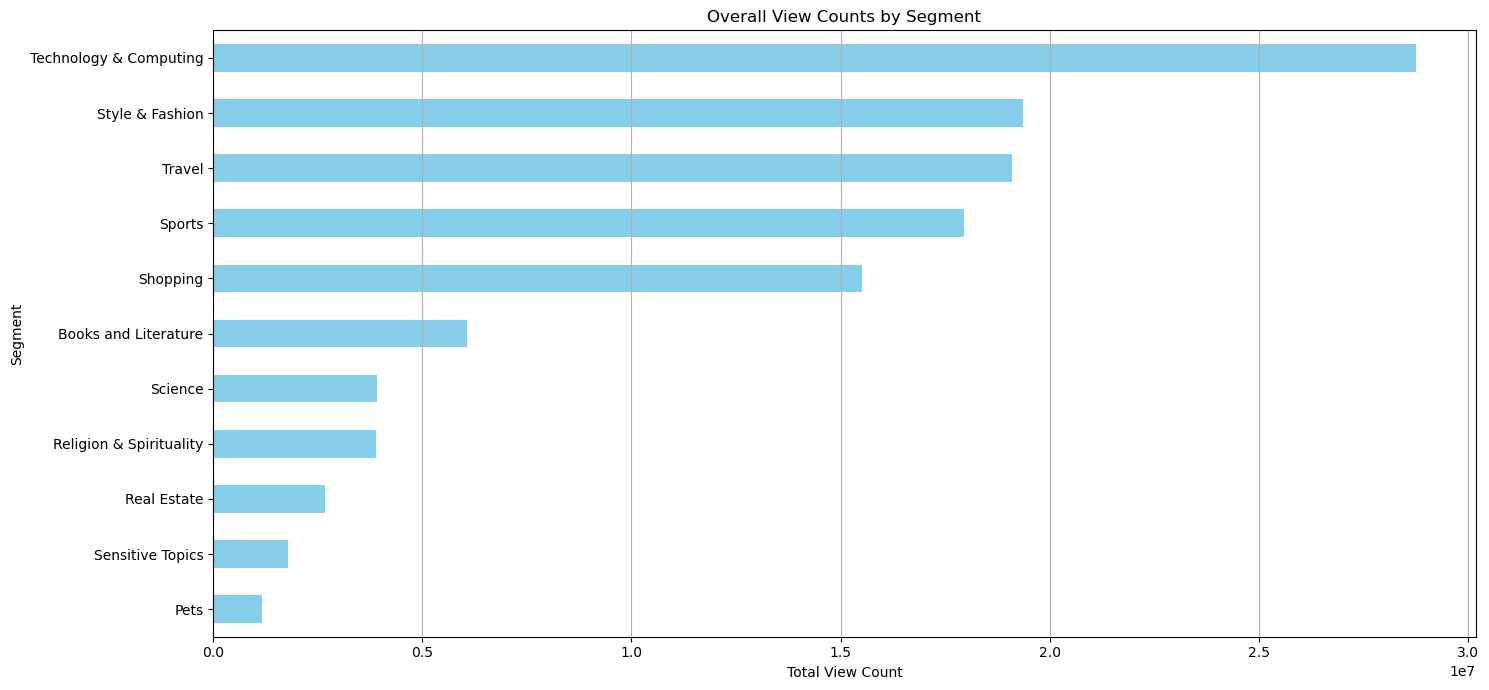

segment_name
Technology & Computing     28744214.0
Style & Fashion            19358950.0
Travel                     19085463.0
Sports                     17948917.0
Shopping                   15504879.0
Books and Literature        6079332.0
Science                     3910647.0
Religion & Spirituality     3902934.0
Real Estate                 2672780.0
Sensitive Topics            1783994.0
Pets                        1176496.0
dtype: float64


In [53]:
grouped = combined.groupby([combined.index, 'segment_name'])['view_count'].mean().unstack()
grouped.index = pd.to_datetime(grouped.index)

#Calculate the sum of views for each segment
segment_sums = grouped.sum()

plt.figure(figsize=(15, 7))
segment_sums.sort_values().plot(kind='barh', color='skyblue')
plt.title('Overall View Counts by Segment')
plt.xlabel('Total View Count')
plt.ylabel('Segment')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

print(segment_sums.sort_values(ascending=False))

## Summary of Views by Category

### **Technology & Computing**:
- **Views**: 28,744,214
- **Comment**: This suggests that content related to technology and computing is the most popular or has the highest engagement among the categories listed.

### **Style & Fashion**:
- **Views**: 19,358,950
- **Comment**: Indicates a significant interest in content related to fashion and personal style.

### **Travel**:
- **Views**: 19,085,463
- **Comment**: Reveals a considerable audience interested in travel-related content.

### **Sports**:
- **Views**: 17,948,917

### **Shopping**:
- **Views**: 15,504,879

### **Books and Literature**:
- **Views**: (Significant drop from top five)

### **Science**:
- **Views**: 3,910,647

### **Religion & Spirituality**:
- Comment: (Almost similar to science)

### **Real Estate**:
- **Views**: 2,672,780

### **Sensitive Topics**:
- **Views**: 1,783,994
- **Comment**: Worth noting that this category is broad. Requires understanding of specific topics under this.

### **Pets**:
- **Views**: (Least viewed but over a million)

## Overall Interpretation

- The most popular content segments revolve around **everyday life**, **personal interests**, and **current events** – technology, fashion, travel, and sports.
- There's a diverse range of interests, with niche categories still garnering millions of views.
- Depending on the goal, content creators or platforms can tailor their strategy. For broad audiences, focus on technology and fashion. For niche audiences, consider real estate or pets.
- These numbers provide a snapshot in time. **Trends can change**. It's valuable to observe these over different periods.

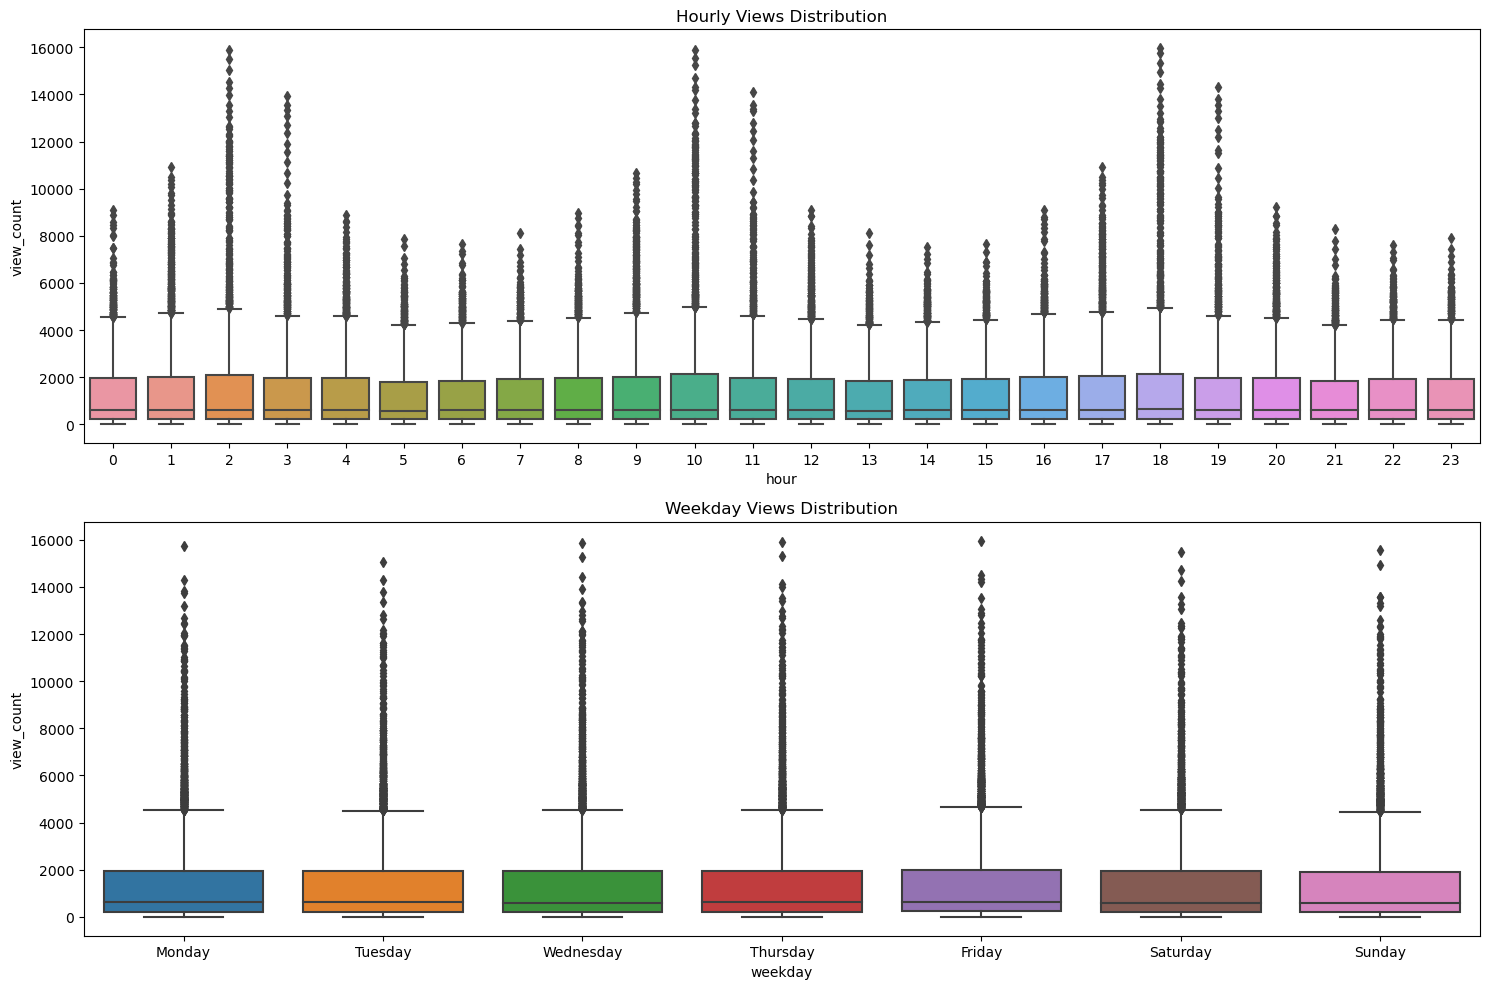

In [58]:
#Checking box plot on data set level to find some potenial seasonality or outliers. 

#Extracting hour and weekday:
datapoints['hour'] = datapoints['time_index'].dt.hour
datapoints['weekday'] = datapoints['time_index'].dt.weekday

fig, ax = plt.subplots(2, 1, figsize=(15, 10))

sns.boxplot(data=datapoints, x='hour', y='view_count', ax=ax[0])
sns.boxplot(data=datapoints, x='weekday', y='view_count', ax=ax[1])

ax[0].set_title('Hourly Views Distribution')
ax[1].set_title('Weekday Views Distribution')
ax[1].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.tight_layout()
plt.show()


## Visible Seasonality on Hourly and Weekly Level

### **Inherent User Behavior**:
- **Explanation**: The 8-hour pattern could be reflective of inherent user behavior. Given that there are 24 hours in a day, an 8-hour seasonality might correspond to daily routines — morning, afternoon, and night. For instance, users might have specific habits upon waking up, after work/school, and before going to bed.

### **Global Audience**:
- **Explanation**: If your platform or content has a global audience, the 8-hour intervals could signify prime time in different time zones. For example, morning in the US, evening in Europe, and night in parts of Asia.

### **Device-Independence**:
- **Explanation**: If this pattern persists regardless of the device type, it suggests that the seasonality isn't tied to a particular device's usage. For instance, it's not because people prefer mobile phones in the morning and computers in the evening; the pattern is consistent across all devices.

### **Segment-Independence**:
- **Explanation**: The seasonality's persistence across different segments (like "Technology & Computing," "Style & Fashion," etc.) indicates that the trend is not content-specific. This means that regardless of what they are viewing, people have a tendency to engage at these 8-hour intervals.

## Operational Implications

### **Content Publishing**:
- **Strategy**: If you're a content platform, you might want to publish or promote fresh content just before these peak times to maximize engagement.

### **Marketing & Ad Campaigns**:
- **Strategy**: Ad campaigns can be scheduled to go live just before these peak periods to ensure maximum visibility and click-through rates.

### **Infrastructure Scaling**:
- **Strategy**: If you're a digital service, understanding when these peaks occur can help in scaling up server resources during expected high-traffic intervals.

### **User Engagement Analysis**:
- **Strategy**: This recurring pattern can be used as a baseline for user engagement. Any deviation from this pattern (like a missed peak) can provide insights into anomalies or events that affected user behavior.


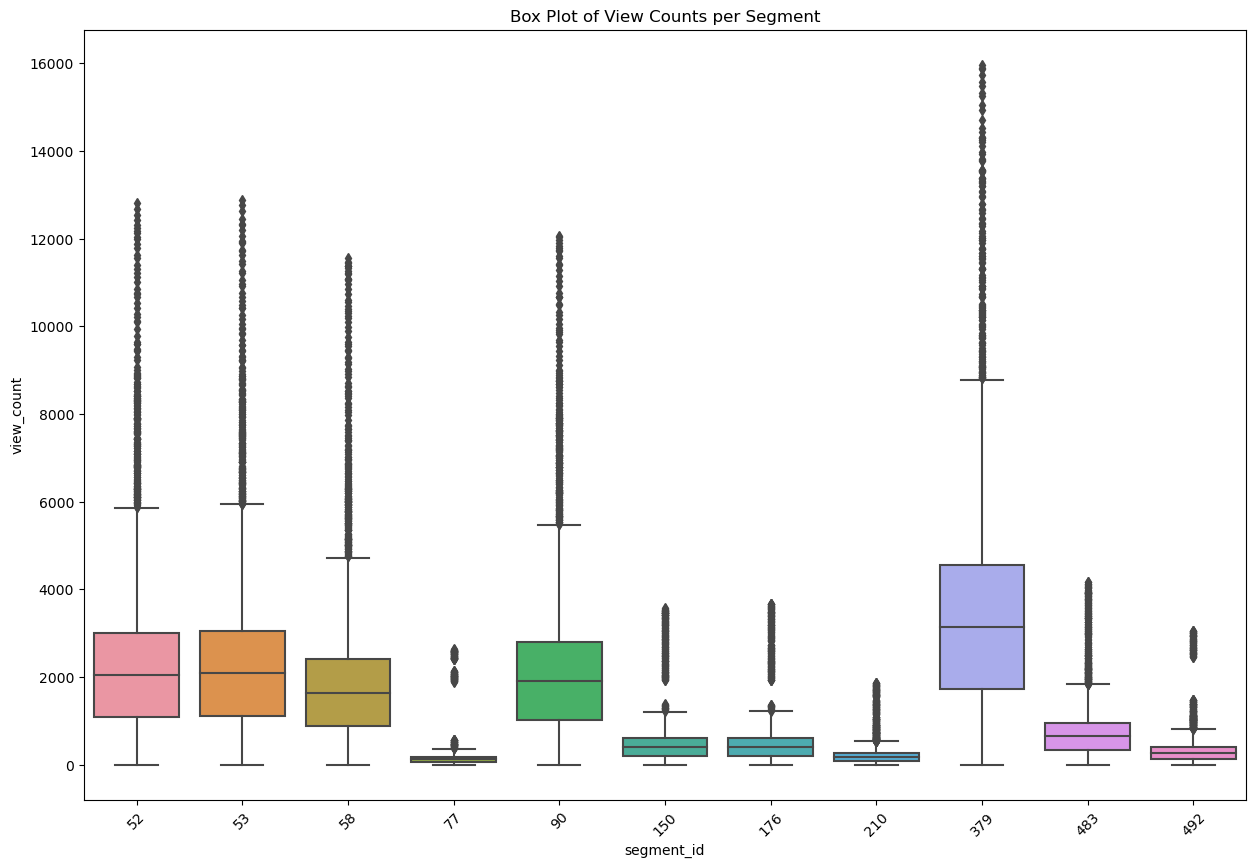

In [55]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='segment_id', y='view_count', data=datapoints)
plt.xticks(rotation=45) 
plt.title('Box Plot of View Counts per Segment')
plt.show()


In [56]:
#Group by 'segment_id' and apply statistical functions to the 'view_count' column
segment_stats = datapoints.groupby('segment_id')['view_count'].agg(
    Q1=lambda x: x.quantile(0.25),
    Median=lambda x: x.quantile(0.5),
    Q3=lambda x: x.quantile(0.75),
    IQR=lambda x: x.quantile(0.75) - x.quantile(0.25),
    LowerWhisker=lambda x: x.quantile(0.25) - 1.5*(x.quantile(0.75) - x.quantile(0.25)),
    UpperWhisker=lambda x: x.quantile(0.75) + 1.5*(x.quantile(0.75) - x.quantile(0.25))
)

#Filter view counts less than the LowerWhisker or greater than the UpperWhisker for outliers
outliers = datapoints.groupby('segment_id').apply(lambda group: group[
    (group['view_count'] < group['view_count'].quantile(0.25) - 1.5*(group['view_count'].quantile(0.75) - group['view_count'].quantile(0.25))) |
    (group['view_count'] > group['view_count'].quantile(0.75) + 1.5*(group['view_count'].quantile(0.75) - group['view_count'].quantile(0.25)))
]['view_count'])

print(segment_stats)
print(outliers)


                 Q1  Median       Q3      IQR  LowerWhisker  UpperWhisker
segment_id                                                               
52          1087.75  2050.0  3003.00  1915.25     -1785.125      5875.875
53          1109.00  2094.0  3043.25  1934.25     -1792.375      5944.625
58           881.00  1645.0  2419.00  1538.00     -1426.000      4726.000
77            64.00   125.0   188.00   124.00      -122.000       374.000
90          1026.75  1922.5  2808.00  1781.25     -1645.125      5479.875
150          210.00   414.0   614.00   404.00      -396.000      1220.000
176          208.00   408.0   614.00   406.00      -401.000      1223.000
210           94.00   184.0   270.00   176.00      -170.000       534.000
379         1725.75  3155.0  4552.25  2826.50     -2514.000      8792.000
483          349.00   650.5   946.00   597.00      -546.500      1841.500
492          142.75   280.0   413.00   270.25      -262.625       818.375
segment_id       
52          8922    


- **Recommendation**: A recommendation going forward would be to retain identified outliers. While they provide valuable context now, their impact should be reassessed when engaging in future trend analysis or modeling to ensure accurate insights.
- **Outlier Decision**: I decided to keep outliers for now, due to potential future trend removal.


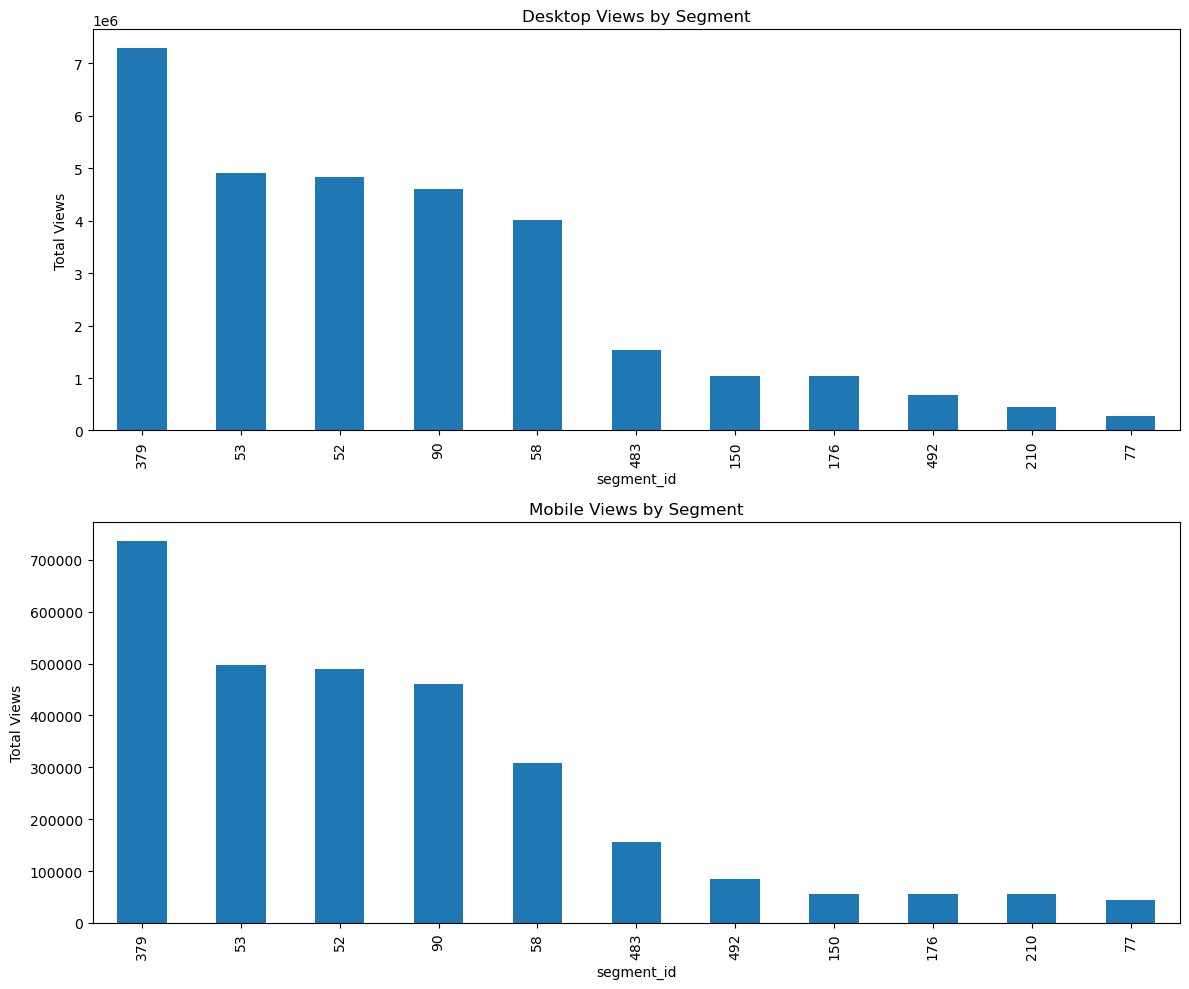

Total Desktop Views by Segment during Weekends:
segment_id
379    7282672
53     4908049
52     4834301
90     4603200
58     4014382
483    1541811
150    1041755
176    1039280
492     666567
210     445963
77      284833
Name: desktop_views, dtype: int64

Total Mobile Views by Segment during Weekends:
segment_id
379    736437
53     496345
52     488886
90     460336
58     308788
483    155902
492     84263
150     55981
176     55853
210     55754
77      43569
Name: mobile_views, dtype: int64

Correlation between Desktop and Mobile views by segment: 0.99


In [59]:
#Convert string representation of dictionaries to actual dictionaries
combined_data['devices'] = combined_data['devices'].apply(ast.literal_eval)

#Extract counts for desktop and mobile
combined_data['desktop_views'] = combined_data['devices'].apply(lambda x: x.get('windows', 0) + x.get('mac os x', 0))
combined_data['mobile_views'] = combined_data['devices'].apply(lambda x: x.get('android', 0) + x.get('iphone', 0))

#Filter for weekends
weekend_data = combined_data[combined_data['time_index'].dt.weekday >= 5]

#Group by segment_id and sum up views for Desktop and Mobile
desktop_group = weekend_data.groupby('segment_id')['desktop_views'].sum()
mobile_group = weekend_data.groupby('segment_id')['mobile_views'].sum()

#Compute correlation
correlation = desktop_group.corr(mobile_group)

#Visualize
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

desktop_group.sort_values(ascending=False).plot(kind='bar', ax=ax[0], title='Desktop Views by Segment')
ax[0].set_ylabel('Total Views')

mobile_group.sort_values(ascending=False).plot(kind='bar', ax=ax[1], title='Mobile Views by Segment')
ax[1].set_ylabel('Total Views')

plt.tight_layout()
plt.show()

print("Total Desktop Views by Segment during Weekends:")
print(desktop_group.sort_values(ascending=False))
print("\nTotal Mobile Views by Segment during Weekends:")
print(mobile_group.sort_values(ascending=False))
print(f"\nCorrelation between Desktop and Mobile views by segment: {correlation:.2f}")



## Analysis on Weekend View Patterns of Content Segments Across Desktop and Mobile Platforms

#### **Top Performing Segments**:

- **Leadership**: Based on the total views garnered during weekends, the "Technology & Computing" segment leads in terms of viewership for both Desktop and Mobile platforms.
- **Close Competitors**: This dominance is closely followed by the "Style & Fashion", "Travel", and "Sports" segments, which exhibit strong viewership on both devices.

#### **View Distribution**:

- **Top 5**: The top 5 segments in Desktop views ("Technology & Computing", "Style & Fashion", "Travel", "Sports", and "Shopping") mirror the top 5 for Mobile views, although their rankings exhibit minor variations.
- **Mid-tier**: Mid-tier segments, such as "Books and Literature" and "Science", have a significant viewership on both platforms but see a considerable drop when compared to the front-runners.

#### **Correlation between Desktop and Mobile Views**:

- **Coefficient Value**: A correlation coefficient of 0.99 between Desktop and Mobile views underscores a nearly flawless linear relationship.
- **Implication**: This suggests that if a segment is trending on Desktop, it's highly probable it will trend on Mobile, and vice versa.

### Interpretation & Recommendations:

- **Consistent Consumer Behavior**: The near-perfect correlation alludes to uniform user behavior across devices. Content themes that resonate on Desktop seem to be equally appealing on Mobile, and vice versa.
- **Optimization Opportunities**: With user behavior being consistent across platforms, it's feasible to extrapolate insights from one platform to tailor content for the other.
- **Segment Prioritization**: "Technology & Computing", "Style & Fashion", "Travel", and "Sports" have demonstrated consistent popularity on both platforms. Prioritize efforts in these areas for content creation, marketing, and optimizations.
- **Opportunity in Mobile Growth**: While viewing patterns are coherent, the absolute numbers hint at growth potential on Mobile. Strategies centered around Mobile user engagement and acquisition can be a growth avenue.

## Conclusion:

The weekend view patterns underscore a significant consistency between Desktop and Mobile consumption habits. Emphasizing top-performing segments and focusing on mobile expansion can drive higher user engagement and potential revenue growth.



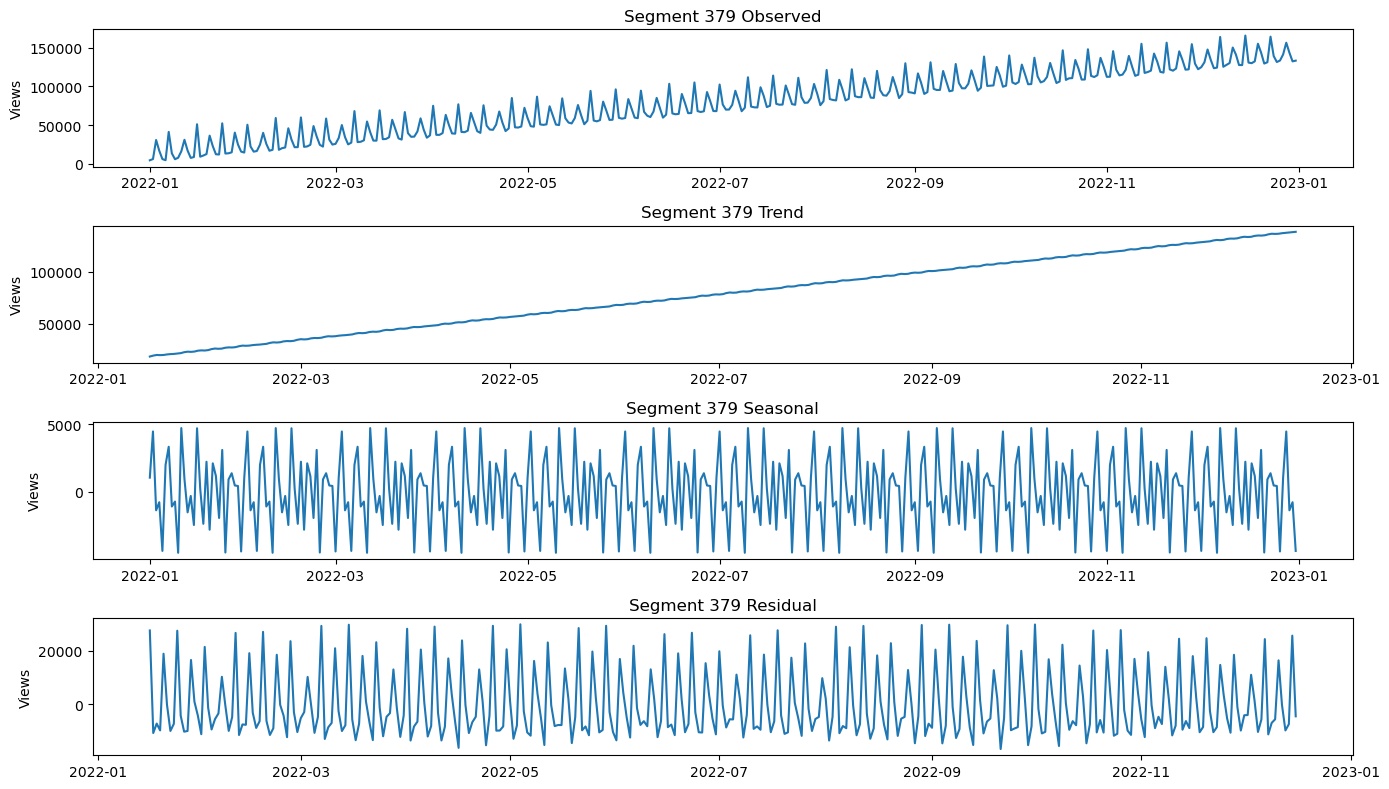

Segment: 379
Trend Mean: 78817.54333333333
Seasonal Mean: -2.7870987846501647
Residual Mean: 67.62184764309869
Trend Std Dev: 34489.74175027889
Seasonal Std Dev: 2674.0450837378194
Residual Std Dev: 13009.442500834697


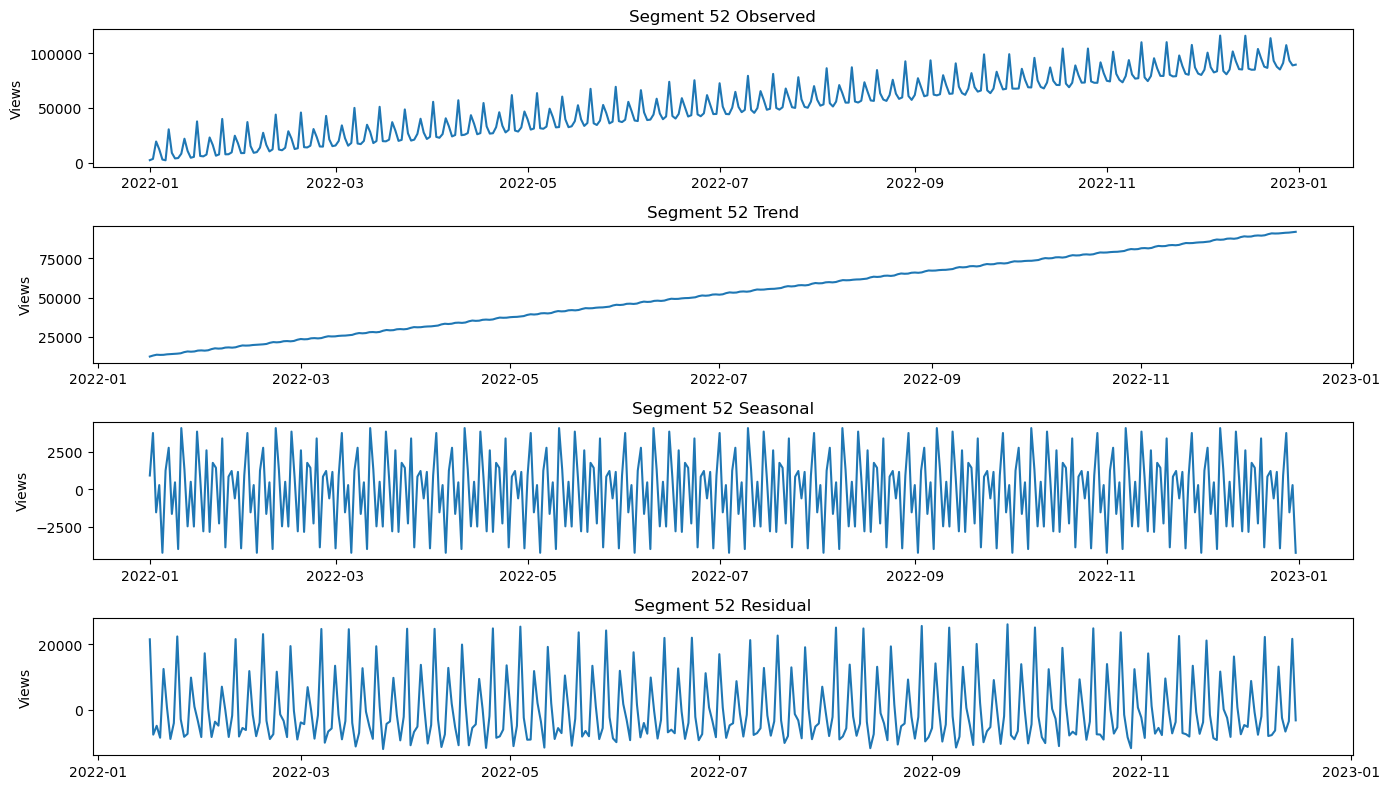

Segment: 52
Trend Mean: 52329.710845771144
Seasonal Mean: -2.082744857248198
Residual Mean: 59.65522306397277
Trend Std Dev: 23009.23007929183
Seasonal Std Dev: 2510.4404386208926
Residual Std Dev: 10361.48419255736


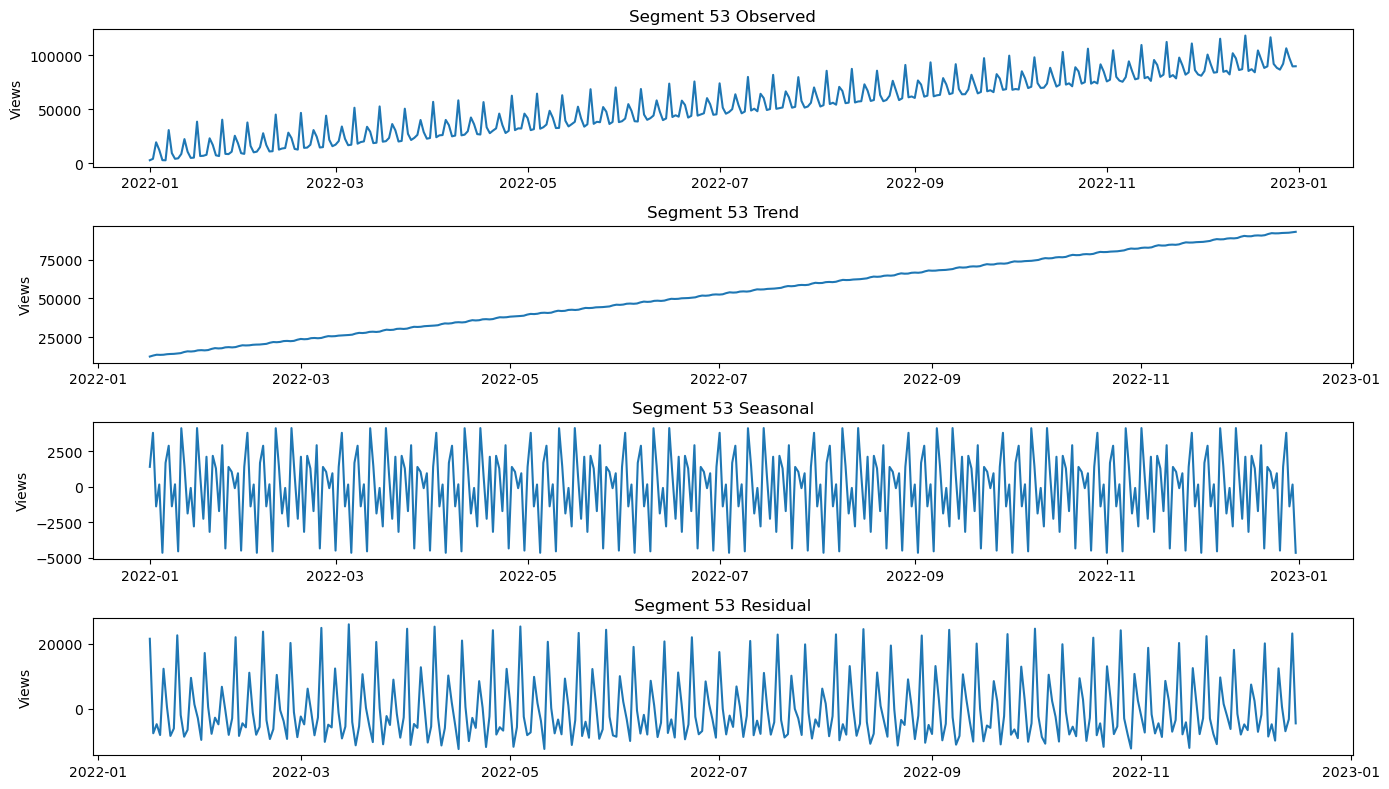

Segment: 53
Trend Mean: 53095.19587064677
Seasonal Mean: -1.7245195101701827
Residual Mean: 66.18477272727333
Trend Std Dev: 23285.236420646703
Seasonal Std Dev: 2607.2369938059705
Residual Std Dev: 10221.083123260347


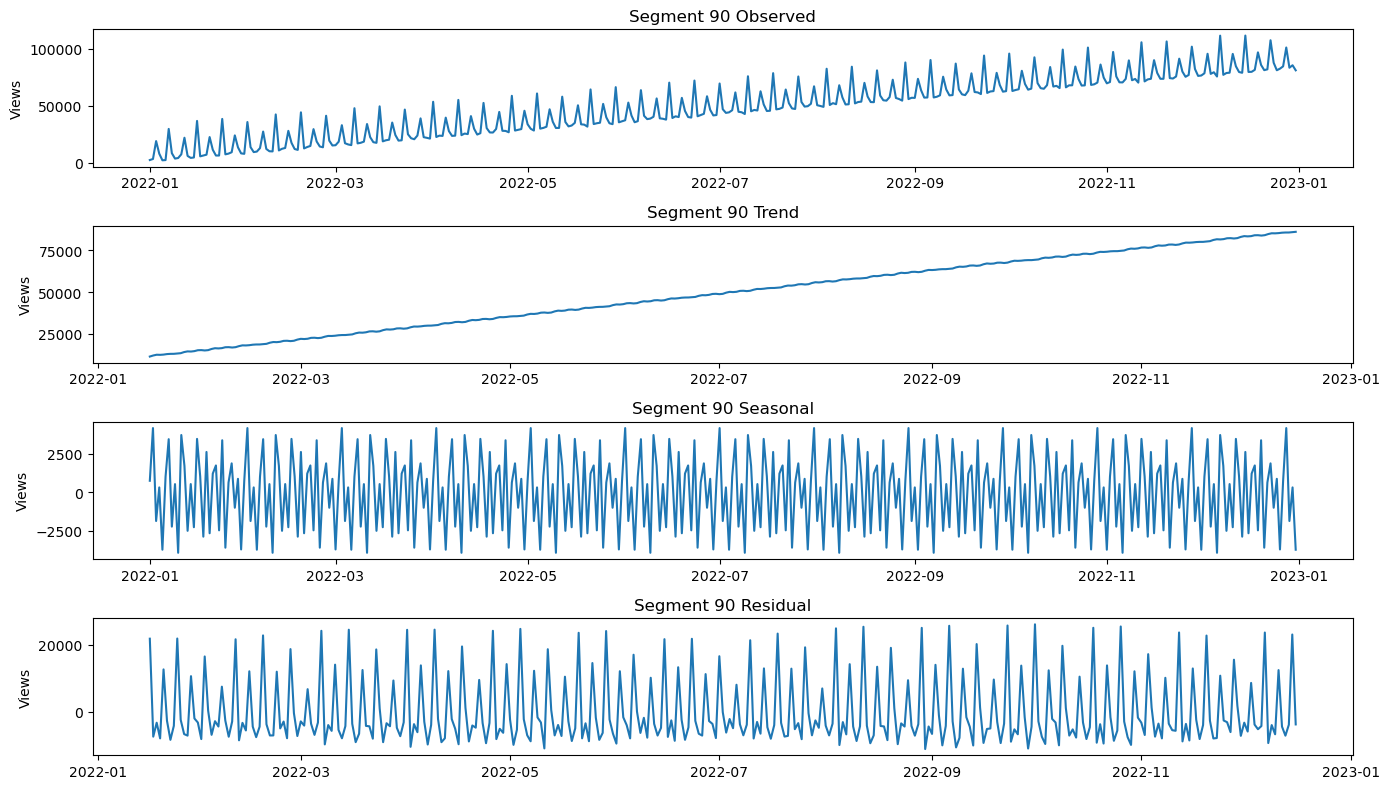

Segment: 90
Trend Mean: 49243.92363184079
Seasonal Mean: -1.0673796180987465
Residual Mean: 62.7875000000001
Trend Std Dev: 21609.025368011462
Seasonal Std Dev: 2500.328931244119
Residual Std Dev: 10199.15946169465


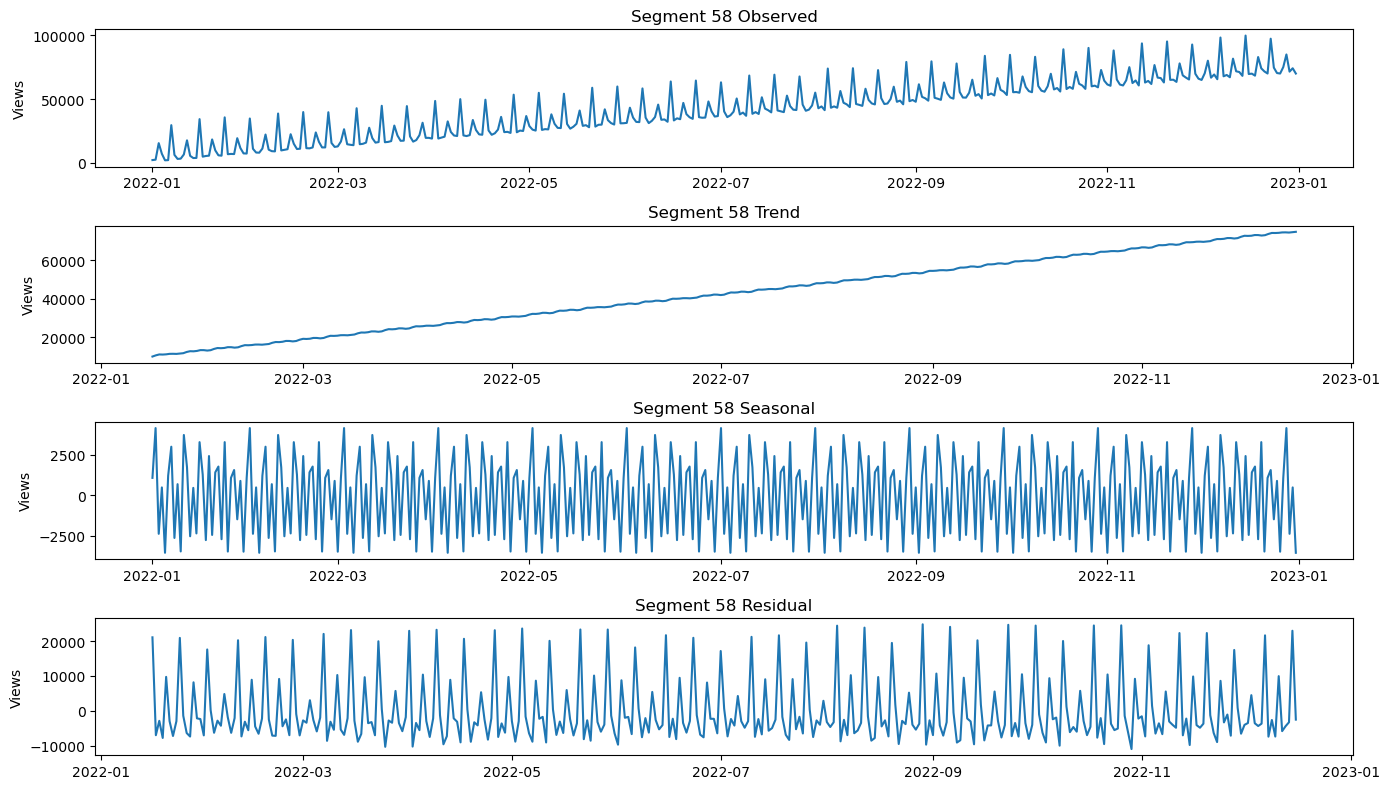

Segment: 58
Trend Mean: 42527.24228855721
Seasonal Mean: -0.6940181495317805
Residual Mean: 63.19332491582492
Trend Std Dev: 18728.53433611475
Seasonal Std Dev: 2467.549608062263
Residual Std Dev: 9397.289658068836


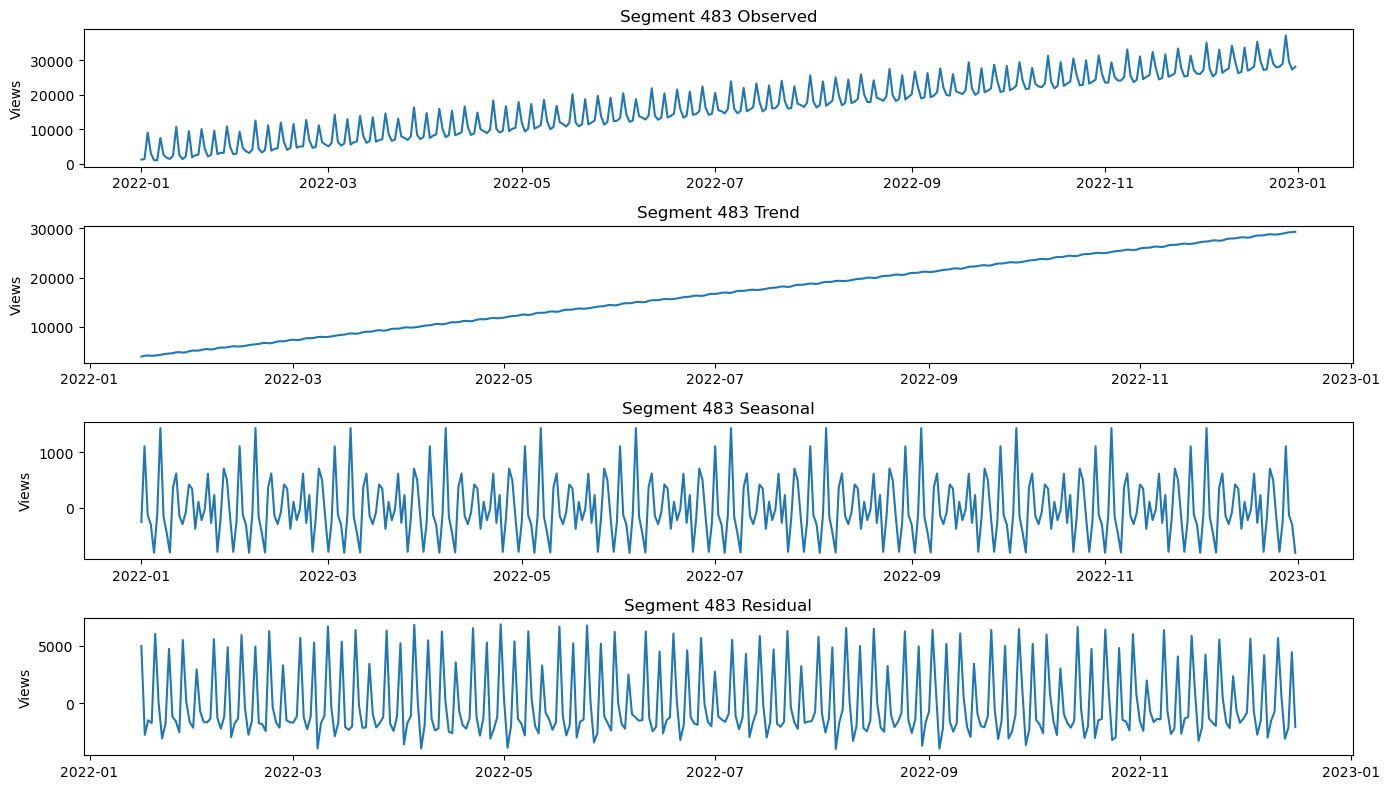

Segment: 483
Trend Mean: 16665.69482587065
Seasonal Mean: -1.0908544924127053
Residual Mean: 8.670559764309724
Trend Std Dev: 7293.122483609025
Seasonal Std Dev: 540.0715641821843
Residual Std Dev: 3102.7029055409303


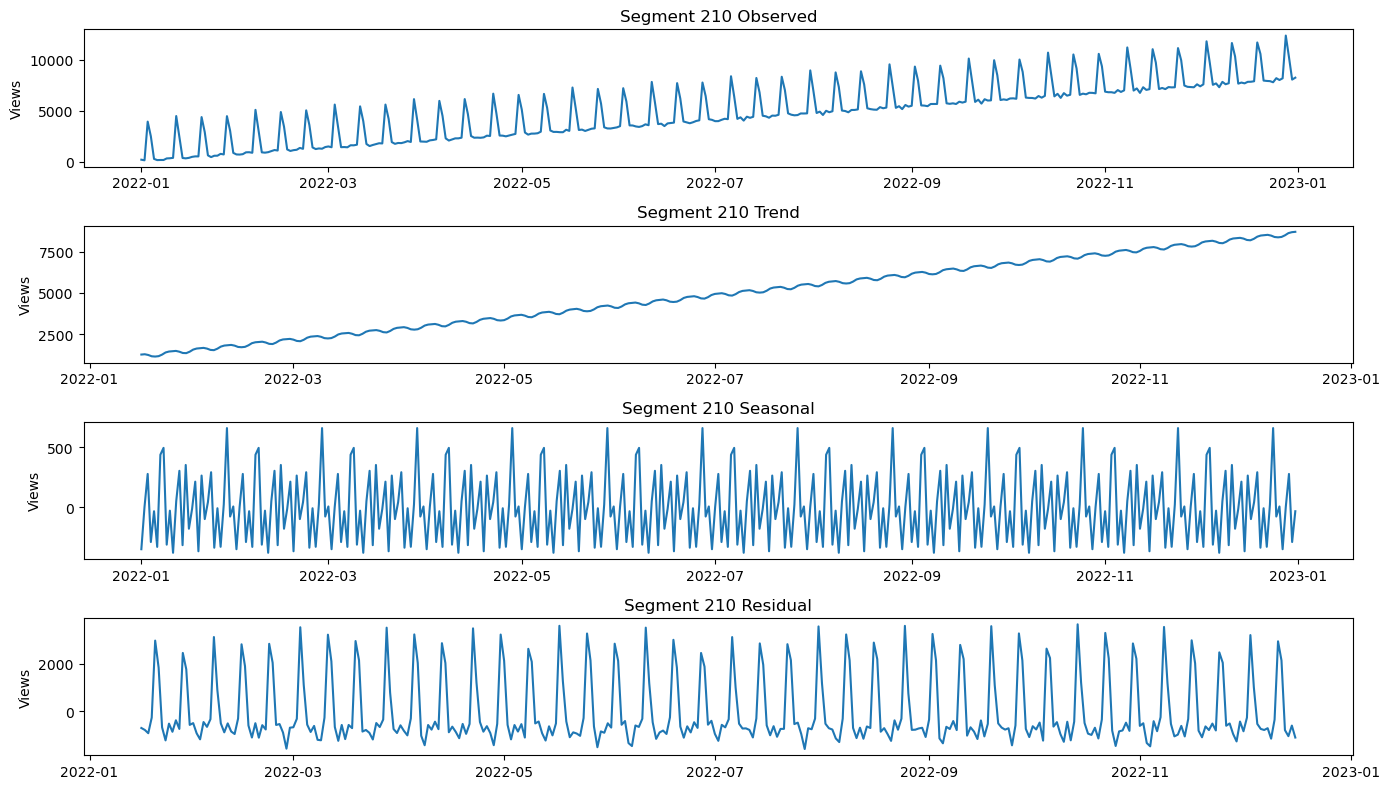

Segment: 210
Trend Mean: 4882.369004975125
Seasonal Mean: -1.0581887366818812
Residual Mean: -3.6158585858585104
Trend Std Dev: 2150.744472867667
Seasonal Std Dev: 283.9407033182739
Residual Std Dev: 1440.534058339935


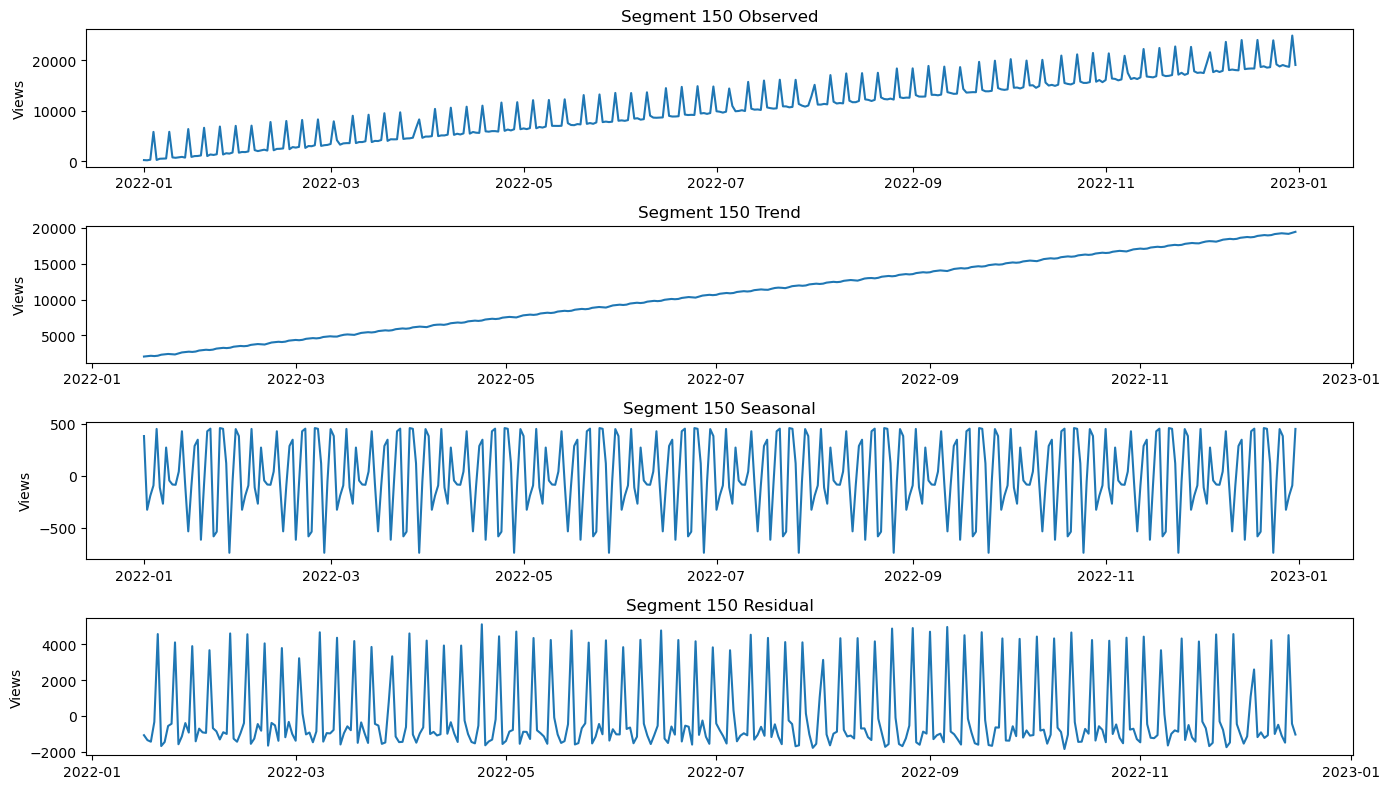

Segment: 150
Trend Mean: 10715.826815920398
Seasonal Mean: 0.5818065356764068
Residual Mean: -4.6685437710435975
Trend Std Dev: 5031.176476534388
Seasonal Std Dev: 361.65938100102
Residual Std Dev: 2114.59626763396


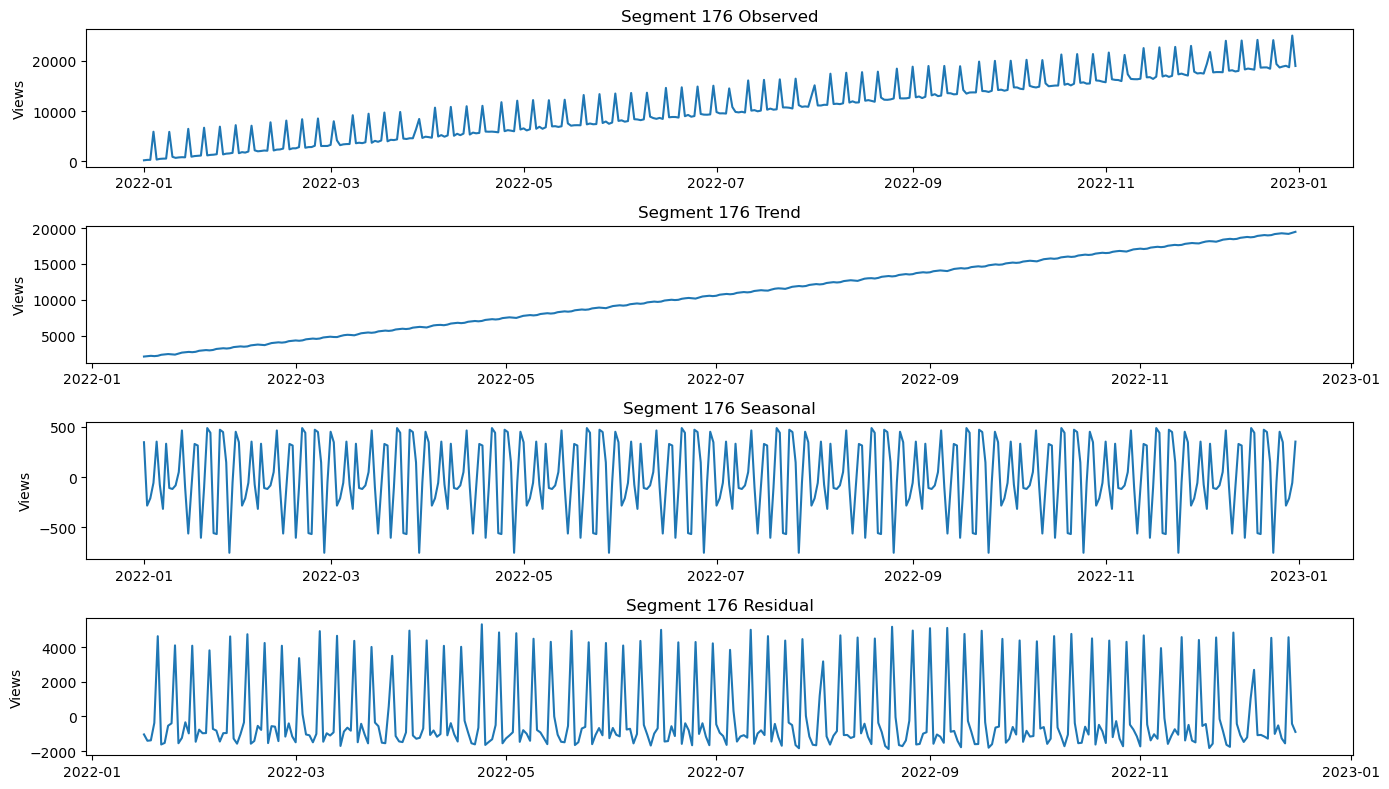

Segment: 176
Trend Mean: 10690.800945273633
Seasonal Mean: 0.4181803768276227
Residual Mean: -4.417773569023431
Trend Std Dev: 5050.006897054542
Seasonal Std Dev: 365.86475558006333
Residual Std Dev: 2209.58125077048


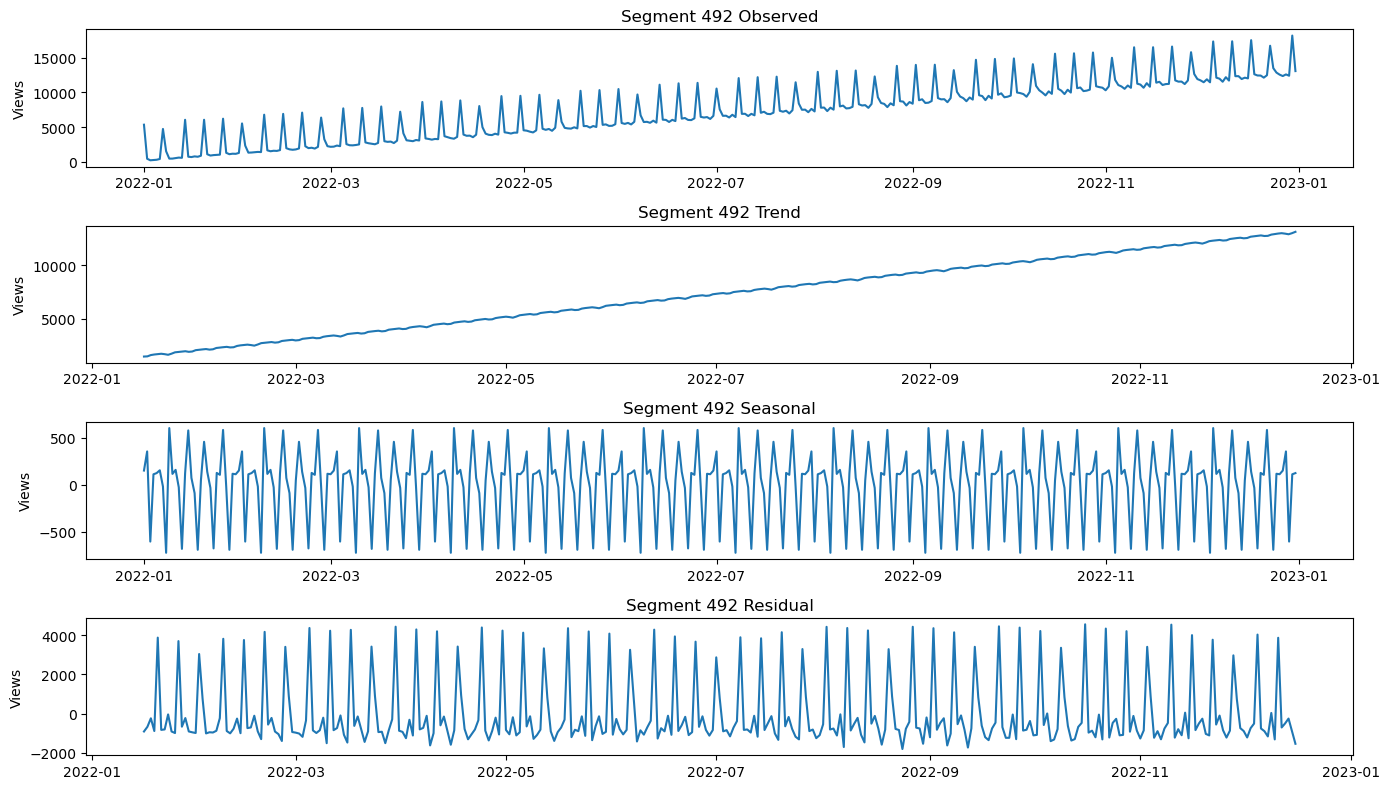

Segment: 492
Trend Mean: 7312.693233830846
Seasonal Mean: 0.3891734698583901
Residual Mean: -9.331178451178417
Trend Std Dev: 3345.606630823168
Seasonal Std Dev: 380.90090751207964
Residual Std Dev: 1785.3146655433557


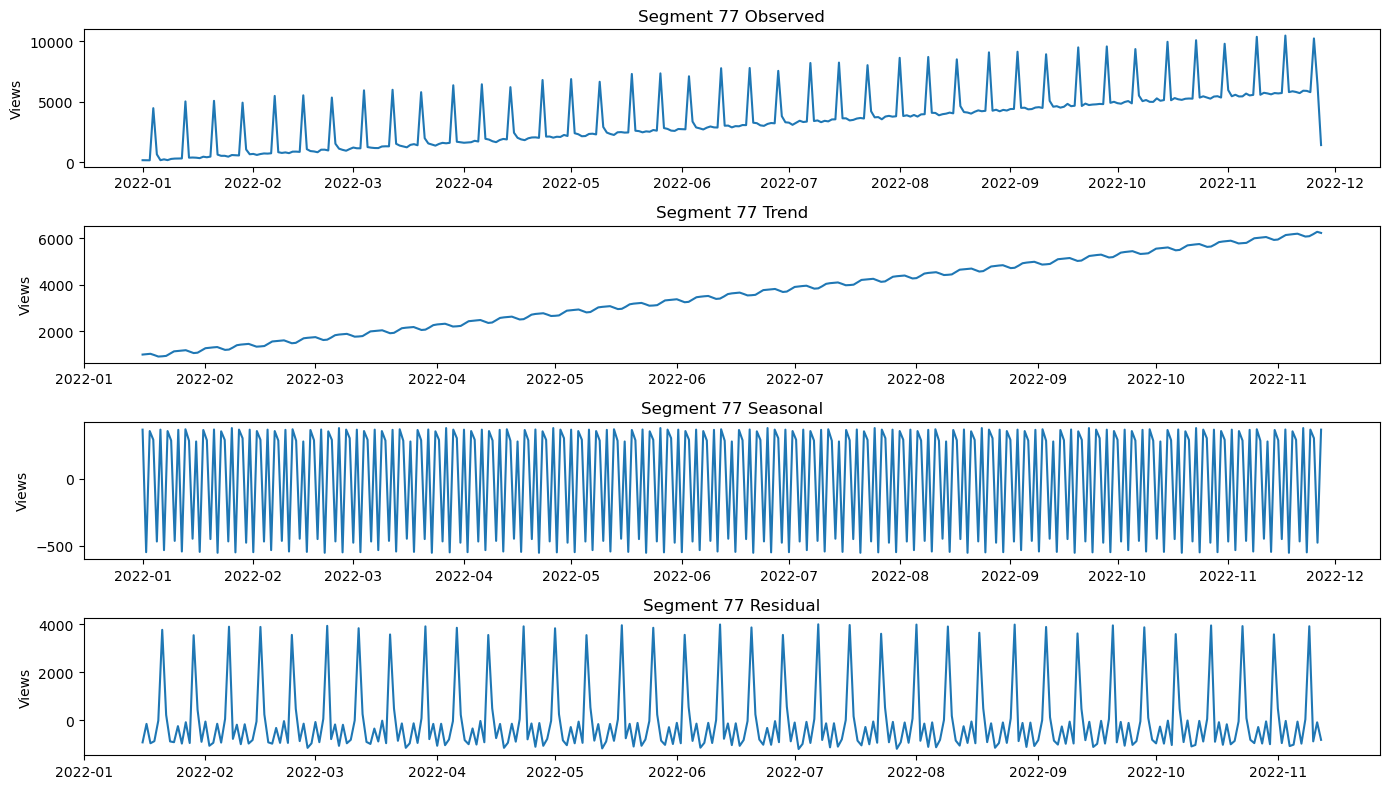

Segment: 77
Trend Mean: 3561.573975636766
Seasonal Mean: 1.1106270255424178
Residual Mean: -2.7542121212120634
Trend Std Dev: 1537.6345183793137
Seasonal Std Dev: 413.37394398015135
Residual Std Dev: 1481.195625151118


In [60]:
for segment, data in segment_dataframes.items():
    
    #Resample to daily data
    daily_data = data.set_index('time_index').resample('D')['view_count'].sum()
    
    try:
        #Decomposition
        decomposition = seasonal_decompose(daily_data, model='additive', period=30) 
        
        #Plotting
        fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 8))

        #Original series
        ax1.plot(decomposition.observed)
        ax1.set_title(f'Segment {segment} Observed')
        ax1.set_ylabel('Views')

        #Trend
        ax2.plot(decomposition.trend)
        ax2.set_title(f'Segment {segment} Trend')
        ax2.set_ylabel('Views')

        #Seasonal
        ax3.plot(decomposition.seasonal)
        ax3.set_title(f'Segment {segment} Seasonal')
        ax3.set_ylabel('Views')

        # Residual
        ax4.plot(decomposition.resid)
        ax4.set_title(f'Segment {segment} Residual')
        ax4.set_ylabel('Views')

        plt.tight_layout()
        plt.show()

        #Printing summary statistics
        print(f"Segment: {segment}")
        print(f"Trend Mean: {np.nanmean(decomposition.trend)}")
        print(f"Seasonal Mean: {np.nanmean(decomposition.seasonal)}")
        print(f"Residual Mean: {np.nanmean(decomposition.resid)}")
        print(f"Trend Std Dev: {np.nanstd(decomposition.trend)}")
        print(f"Seasonal Std Dev: {np.nanstd(decomposition.seasonal)}")
        print(f"Residual Std Dev: {np.nanstd(decomposition.resid)}")
        print("=====================================")

    except Exception as e:
        print(f"Error decomposing data for segment {segment}: {e}")



## Conclusions and Recommendations:

### Patterns:

- **Key Segments**: The segments such as "Technology & Computing", "Travel", and "Style & Fashion" showcase high average trends, indicating a robust daily viewership.

### Recommendation:

- **Monitoring Volatile Segments**: For segments exhibiting high volatility, a close watch is recommended to detect changes in trends and to further probe underlying causes for these shifts.
  
- **Leveraging Seasonality**: For segments that display pronounced seasonality, synchronizing marketing or promotional endeavors with these patterns can be advantageous.


<Figure size 1600x800 with 0 Axes>

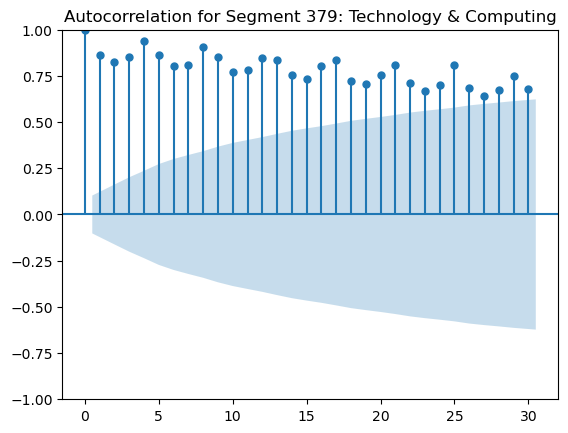

<Figure size 1600x800 with 0 Axes>

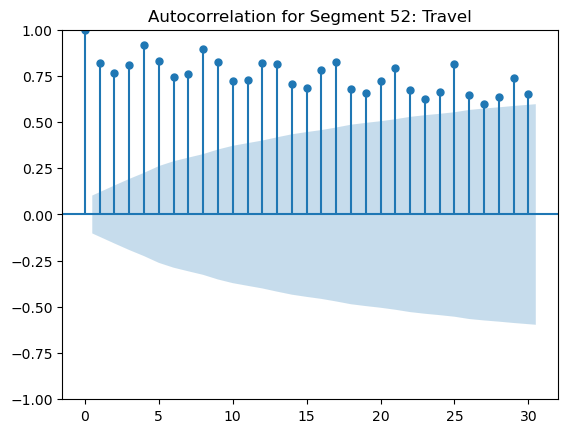

<Figure size 1600x800 with 0 Axes>

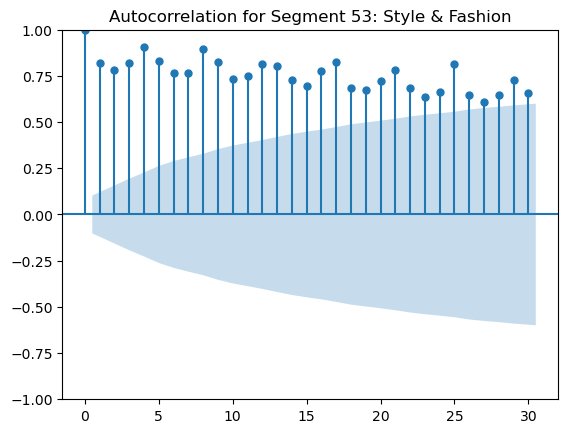

<Figure size 1600x800 with 0 Axes>

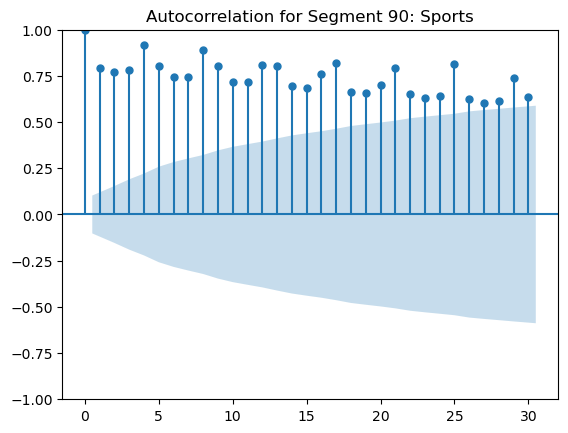

<Figure size 1600x800 with 0 Axes>

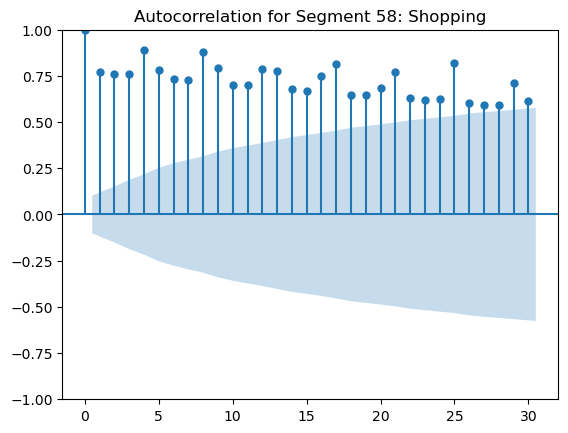

<Figure size 1600x800 with 0 Axes>

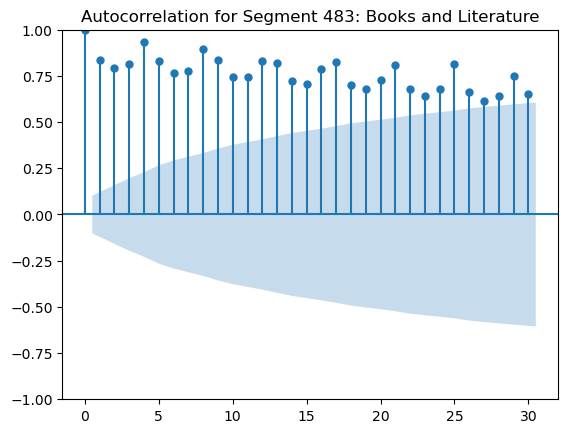

<Figure size 1600x800 with 0 Axes>

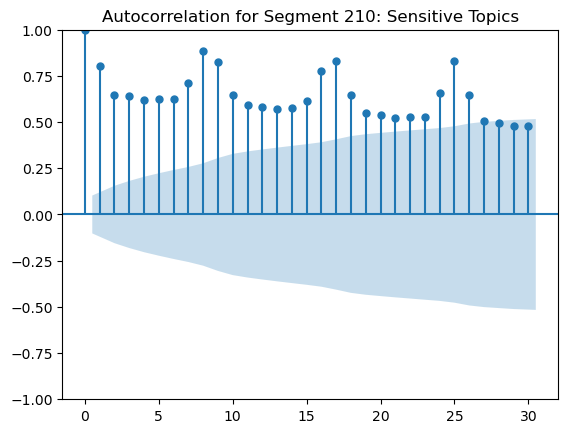

<Figure size 1600x800 with 0 Axes>

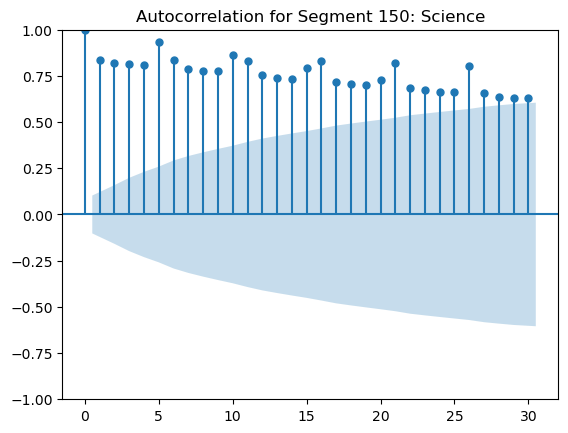

<Figure size 1600x800 with 0 Axes>

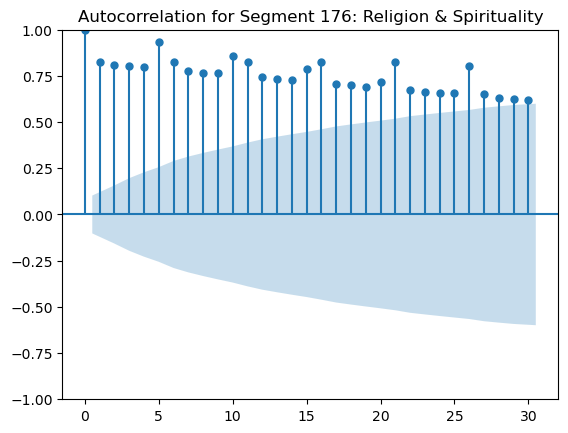

<Figure size 1600x800 with 0 Axes>

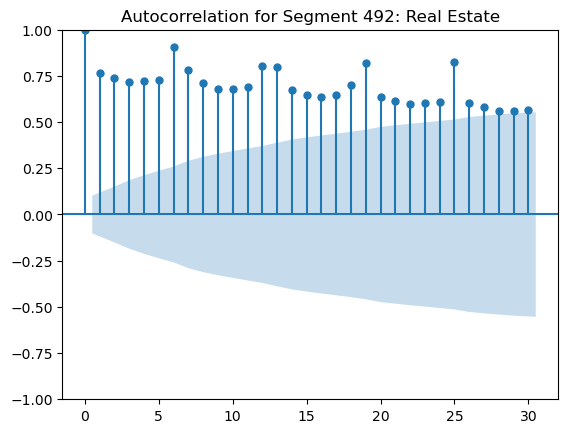

<Figure size 1600x800 with 0 Axes>

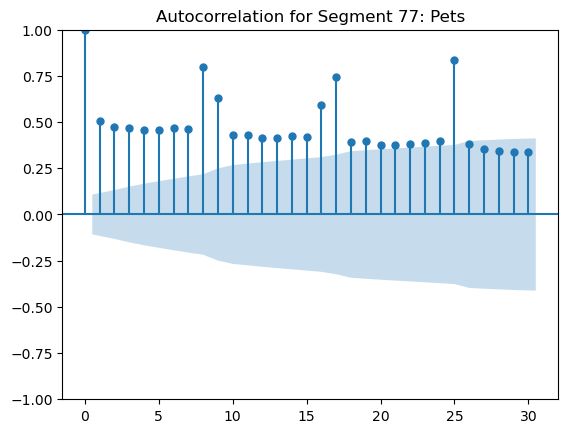

In [88]:
from statsmodels.graphics.tsaplots import plot_acf

#Loop through each segment's data and plot autocorrelation
for segment, data in segment_dataframes.items():
    
    #Resample data to daily views
    daily_data = data.set_index('time_index').resample('D')['view_count'].sum()
    
    plt.figure(figsize=(16, 8))
    plot_acf(daily_data, lags=30)  
    plt.title(f'Autocorrelation for Segment {segment}: {data["segment_name"].iloc[0]}')
    plt.show()

#For each segment factor drops relatively slowly, time component is important, might be non-stationary data.

## Analysis of Autocorrelation Values by Segment

### Technology & Computing:
- **Observation**: The autocorrelation values remain high (around 0.8) even at higher lags.
- **Implication**: Suggests a strong seasonality or trend. Data is likely predictable based on past values.

### Travel:
- **Observation**: Autocorrelation values are high at higher lags but slightly lower than "Technology & Computing."
- **Implication**: Data has some degree of seasonality.

### Style & Fashion:
- **Observation**: Autocorrelation values are similar to "Travel".
- **Implication**: Some seasonality observed. Current values can be predicted using past values.

### Sports:
- **Observation**: Autocorrelation values hover around the 0.7-0.8 range.
- **Implication**: Some degree of predictability from past values is present.

### Shopping:
- **Observation**: Values here resemble "Sports".
- **Implication**: Indicative of seasonality and potential predictability.

### Books and Literature:
- **Observation**: Strong autocorrelation values close to "Technology & Computing".
- **Implication**: Indicates strong seasonality or trend.

### Sensitive Topics:
- **Observation**: Lower autocorrelation values compared to other segments. Faster drop observed as the lag increases.
- **Implication**: There's less predictability from past values.

### Science:
- **Observation**: Initial lags suggest high autocorrelation.

---

## Summary:
Most segments exhibit high autocorrelation values, alluding to a strong trend or seasonality. Thus, the current values of these segments can be predicted using past data. An outlier in this trend is the "Sensitive Topics" segment, which showcases a rapid decrease in its autocorrelation values, indicating reduced predictability.


In [91]:
#Performing ADF (Augmented Dickey Fuller) test to confirm my assumptions from autocorrelation test. 
from statsmodels.tsa.stattools import adfuller

def perform_adf_test(series):
    result = adfuller(series)
    return result[1]  

for segment, data in segment_dataframes.items():

    hourly_data = data.set_index('time_index')['view_count']
    
    p_value = perform_adf_test(hourly_data.dropna())
    
    if p_value < 0.05:
        print(f"Segment {segment}: Time series is stationary (p-value: {p_value:.4f})")
    else:
        print(f"Segment {segment}: Time series is NOT stationary (p-value: {p_value:.4f})")


Segment 379: Time series is stationary (p-value: 0.0002)
Segment 52: Time series is stationary (p-value: 0.0000)
Segment 53: Time series is stationary (p-value: 0.0000)
Segment 90: Time series is stationary (p-value: 0.0000)
Segment 58: Time series is stationary (p-value: 0.0000)
Segment 483: Time series is stationary (p-value: 0.0000)
Segment 210: Time series is stationary (p-value: 0.0000)
Segment 150: Time series is stationary (p-value: 0.0000)
Segment 176: Time series is stationary (p-value: 0.0000)
Segment 492: Time series is stationary (p-value: 0.0000)
Segment 77: Time series is stationary (p-value: 0.0000)


In [92]:
#Drop the 'id' and 'segment_name' columns
model_df = combined_data.drop(columns=['id', 'segment_name'])

#Create a lagged feature for 'view_count'- removing trend
model_df['view_count_lagged'] = model_df.groupby('segment_id')['view_count'].shift(1)

print(model_df.head())


   segment_id          time_index  view_count  \
0         379 2022-01-01 00:00:00         177   
1         379 2022-01-01 01:00:00         135   
2         379 2022-01-01 02:00:00          26   
3         379 2022-01-01 03:00:00         159   
4         379 2022-01-01 04:00:00          50   

                                             devices  desktop_views  \
0  {'windows': 120, 'android': 7, 'mac os x': 37,...            157   
1  {'windows': 92, 'android': 5, 'mac os x': 28, ...            120   
2  {'windows': 18, 'android': 1, 'mac os x': 5, '...             23   
3  {'windows': 108, 'android': 6, 'mac os x': 33,...            141   
4  {'windows': 34, 'android': 2, 'mac os x': 10, ...             44   

   mobile_views  view_count_lagged  
0            16                NaN  
1            12              177.0  
2             2              135.0  
3            14               26.0  
4             4              159.0  


In [93]:
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    #Filter out records that have view_count outside the bounds
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

#Apply the remove_outliers function for each segment
no_outliers_df = model_df.groupby('segment_id').apply(remove_outliers, column_name='view_count').reset_index(drop=True)

print(no_outliers_df.head())


   segment_id          time_index  view_count  \
0          52 2022-01-01 00:00:00         106   
1          52 2022-01-01 01:00:00           5   
2          52 2022-01-01 02:00:00         124   
3          52 2022-01-01 03:00:00         166   
4          52 2022-01-01 04:00:00         135   

                                             devices  desktop_views  \
0  {'windows': 72, 'android': 4, 'mac os x': 22, ...             94   
1  {'windows': 3, 'android': 0, 'mac os x': 1, 'i...              4   
2  {'windows': 84, 'android': 5, 'mac os x': 26, ...            110   
3  {'windows': 113, 'android': 7, 'mac os x': 35,...            148   
4  {'windows': 92, 'android': 5, 'mac os x': 28, ...            120   

   mobile_views  view_count_lagged  
0             9                NaN  
1             0              106.0  
2            11                5.0  
3            15              124.0  
4            12              166.0  


In [94]:
def remove_seasonality_with_differencing(df, column_name, lag):
    df[f"{column_name}_diff"] = df[column_name] - df[column_name].shift(lag)
    return df.dropna()  # This will remove rows with NaN values due to shifting

lag = 3  #Adjust based on your detected seasonality - 3*8=24
no_seasonality_df = no_outliers_df.groupby('segment_id').apply(remove_seasonality_with_differencing, column_name='view_count', lag=lag).reset_index(drop=True)


In [99]:
from statsmodels.tsa.stattools import acf, pacf

#Extracting ACF and PACF values
def get_acf_pacf_values(series, nlags):
    acf_values = acf(series, nlags=nlags, fft=True)
    pacf_values = pacf(series, nlags=nlags, method='ols')
    
    return acf_values, pacf_values

nlags = 3

#Dictionary to store ACF and PACF values for each segment
acf_pacf_values = {}

for segment, series in differenced_data.items():
    acf_values, pacf_values = get_acf_pacf_values(series.dropna(), nlags)
    
    significant_lags_acf = [i for i, val in enumerate(acf_values) if abs(val) > 0.2]
    significant_lags_pacf = [i for i, val in enumerate(pacf_values) if abs(val) > 0.2]
    
    acf_pacf_values[segment] = {
        'acf_values': acf_values,
        'pacf_values': pacf_values,
        'significant_lags_acf': significant_lags_acf,
        'significant_lags_pacf': significant_lags_pacf
    }
    
    print(f"\nSegment {segment}:")
    print(f"ACF values:\n{acf_values}")
    print(f"PACF values:\n{pacf_values}")
    print(f"Significant lags from ACF (potential q values): {significant_lags_acf}")
    print(f"Significant lags from PACF (potential p values): {significant_lags_pacf}")



Segment 379:
ACF values:
[ 1.         -0.36462143 -0.28008183 -0.21568087]
PACF values:
[ 1.         -0.36462224 -0.47690631 -0.81220013]
Significant lags from ACF (potential q values): [0, 1, 2, 3]
Significant lags from PACF (potential p values): [0, 1, 2, 3]

Segment 52:
ACF values:
[ 1.         -0.36997413 -0.26386852 -0.20435025]
PACF values:
[ 1.         -0.3699749  -0.46447485 -0.77180774]
Significant lags from ACF (potential q values): [0, 1, 2, 3]
Significant lags from PACF (potential p values): [0, 1, 2, 3]

Segment 53:
ACF values:
[ 1.         -0.404841   -0.22369112 -0.14684974]
PACF values:
[ 1.         -0.40484105 -0.46402501 -0.71645381]
Significant lags from ACF (potential q values): [0, 1, 2]
Significant lags from PACF (potential p values): [0, 1, 2, 3]

Segment 90:
ACF values:
[ 1.         -0.46148548 -0.08334285 -0.30511469]
PACF values:
[ 1.         -0.46158928 -0.37667064 -0.79279912]
Significant lags from ACF (potential q values): [0, 1, 3]
Significant lags from P

In [104]:
#Mapping segment_ids to potential (p, q) values
segment_pq_values = {
    379: [(p, q) for p in [0, 1, 2, 3] for q in [0, 1, 2, 3]],
    52: [(p, q) for p in [0, 1, 2, 3] for q in [0, 1, 2, 3]],
    53: [(p, q) for p in [0, 1, 2, 3] for q in [0, 1, 2]],
    90: [(p, q) for p in [0, 1, 2, 3] for q in [0, 1, 3]],
    58: [(p, q) for p in [0, 1, 2, 3] for q in [0, 1, 3]],
    483: [(p, q) for p in [0, 1, 2, 3] for q in [0, 1, 2, 3]],
    210: [(p, q) for p in [0, 2] for q in [0, 2]],
    150: [(p, q) for p in [0, 1, 2, 3] for q in [0, 1]],
    176: [(p, q) for p in [0, 1, 2, 3] for q in [0, 1]],
    492: [(p, q) for p in [0, 1, 2, 3] for q in [0, 1]],
    77: [(p, q) for p in [0, 1, 2, 3] for q in [0, 1]]
}


# **Time Series Model Selection: ARMA (AutoRegressive Moving Average)**

## **Reasons for Choosing ARMA:**

### **Hands-On Approach:**
By manually removing seasonality and trend from the dataset, I gained a deep understanding of its underlying structure. This hands-on approach provided me with valuable insights that influenced my subsequent modeling decisions.

### **Stationarity:**
Having manually deseasonalized and detrended the data, I ensured that the series was **stationary**, a fundamental assumption of the ARMA model. This gave me confidence in the model's appropriateness for this dataset.

### **Simplicity and Interpretability:**
I opted for the ARMA model due to its **simplicity** and clear **interpretability**. Without the added complexity of handling seasonality and trend within the model, the ARMA parameters have direct interpretations, making it easier for stakeholders to understand.

### **Efficiency:**
Given that the ARMA model is computationally efficient, especially without the need to factor in seasonality and trend, I was able to achieve faster model fitting and forecasting. This was particularly valuable when running multiple iterations or tests.

### **Flexibility:**
By manually handling the trend and seasonality, I retained full control over how these components were treated. This **flexibility** allowed me to cater to specific domain knowledge and nuances within the dataset.

### **Transparency:**
My manual approach to detrending and deseasonalizing ensured a **transparent** process. I documented each step, ensuring that my analytical process could be reviewed and understood by others.

### **Accuracy:**
Given that I had effectively accounted for the seasonality and trend outside of the model, I believed that ARMA would capture the remaining dynamics of the series more **accurately** than a more complex model might.

## **Conclusion:**
My decision to utilize the ARMA model stemmed from a combination of understanding the data's intricacies and the benefits this model provides in terms of simplicity, interpretability, and efficiency.

In [115]:
def forecast_arma(segment_df, segment_pq_values):
    import numpy as np
    from sklearn.metrics import mean_absolute_error, mean_squared_error
    from statsmodels.tsa.arima.model import ARIMA

    segment_id = segment_df['segment_id'].iloc[0]
    possible_pq = segment_pq_values.get(segment_id)
    
    if not possible_pq:
        print(f"Skipping segment {segment_id} due to lack of (p, q) values.")
        return None

    best_aic = float("inf")
    best_model = None

    #Filter data till November 2022
    train = segment_df[segment_df['time_index'] < '2022-12-01']
    test = segment_df[(segment_df['time_index'] >= '2022-12-01') & (segment_df['time_index'] < '2023-01-01')]

    #If there's no data for December, skip
    if test.empty:
        print(f"Skipping segment {segment_id} due to lack of data for December 2022.")
        return None

    #Grid search for best (p, q) values
    for (p, q) in possible_pq:
        try:
            model = ARIMA(train['view_count'], order=(p, 0, q))
            result = model.fit()
            
            if result.aic < best_aic:
                best_aic = result.aic
                best_model = result
        except:
            continue

    #If no best model found (all combinations failed), skip this segment
    if best_model is None:
        print(f"Skipping segment {segment_id} due to ARIMA fitting issues.")
        return None

    #Forecast only for December 2022
    predictions = best_model.predict(start=len(train), end=len(train)+len(test)-1)

    #Accuracy metrics
    mae = mean_absolute_error(test['view_count'], predictions)
    
    #Creating a dataframe to return
    forecast_df = test[['time_index']].copy()
    forecast_df['actual'] = test['view_count']
    forecast_df['forecasted'] = predictions.values
    forecast_df['segment_id'] = segment_df['segment_id'].iloc[0]
    forecast_df['MAE'] = mae
    
    return forecast_df


In [116]:
forecast_results = []

#Apply the function to each segment
for segment_id in no_seasonality_df['segment_id'].unique():
    segment_data = no_seasonality_df[no_seasonality_df['segment_id'] == segment_id]
    segment_forecast = forecast_arma(segment_data, segment_pq_values)
    if segment_forecast is not None:
        forecast_results.append(segment_forecast)

#Combining all the results into a single DataFrame
final_forecast_df = pd.concat(forecast_results, axis=0, ignore_index=True)
print(final_forecast_df)


Skipping segment 77 due to lack of data for December 2022.
              time_index  actual   forecasted  segment_id         MAE
0    2022-12-01 00:00:00    3050  3400.901155          52  369.687826
1    2022-12-01 01:00:00    3244  3422.495460          52  369.687826
2    2022-12-01 02:00:00    3161  3433.627660          52  369.687826
3    2022-12-01 03:00:00    3911  3439.364172          52  369.687826
4    2022-12-01 04:00:00    3459  3442.317932          52  369.687826
...                  ...     ...          ...         ...         ...
7183 2022-12-31 19:00:00     566   484.954875         492   41.965692
7184 2022-12-31 20:00:00     574   484.952441         492   41.965692
7185 2022-12-31 21:00:00     638   484.950008         492   41.965692
7186 2022-12-31 22:00:00     504   484.947574         492   41.965692
7187 2022-12-31 23:00:00     547   484.945141         492   41.965692

[7188 rows x 5 columns]


In [117]:
for segment in segment_ids:
    print(f"Segment {segment} Forecast and Actual Values:")
    print(segment_forecasts[segment][['time_index', 'actual', 'forecasted']])
    print("\n" + "-"*50 + "\n")


Segment 52 Forecast and Actual Values:
             time_index  actual   forecasted
0   2022-12-01 00:00:00    3050  3400.901155
1   2022-12-01 01:00:00    3244  3422.495460
2   2022-12-01 02:00:00    3161  3433.627660
3   2022-12-01 03:00:00    3911  3439.364172
4   2022-12-01 04:00:00    3459  3442.317932
..                  ...     ...          ...
712 2022-12-31 19:00:00    3499  3438.518750
713 2022-12-31 20:00:00    3558  3438.508948
714 2022-12-31 21:00:00    3304  3438.499147
715 2022-12-31 22:00:00    4035  3438.489345
716 2022-12-31 23:00:00    3247  3438.479543

[717 rows x 3 columns]

--------------------------------------------------

Segment 53 Forecast and Actual Values:
              time_index  actual   forecasted
717  2022-12-01 00:00:00    3687  3509.953235
718  2022-12-01 01:00:00    3560  3506.625747
719  2022-12-01 02:00:00    3779  3483.913945
720  2022-12-01 03:00:00    3184  3493.419047
721  2022-12-01 04:00:00    3705  3477.223517
...                  ...     

# **Analysis of Forecast Results:**

## **Visual Inspection:**
Upon plotting both the actual and forecasted values on a time series graph, it's evident that the forecast sometimes aligns with the actual values, but not consistently across all segments.

## **Segmented Analysis:**

### **Travel (Segment 52):**
There's a remarkable consistency in the forecast at roughly 3438, despite actual values showing some variability.

### **Style & Fashion (Segment 53):**
Forecasts oscillate between 3475 and 3487, aligning relatively well with the actuals but hinting at a potential bias.

### **Shopping (Segment 58):**
The predicted values circle the 2782-2789 range, while real values exhibit a broader spectrum of variation.

### **Sports (Segment 90):**
Forecasts predominantly gravitate around the 3218 mark, in contrast to the actuals which demonstrate a significant disparity.

### **Science (Segment 150) & Religion & Spirituality (Segment 176):**
For both these segments, forecasts remain steady at approximately 727, but the genuine figures indicate a more considerable fluctuation.

### **Sensitive Topics (Segment 210):**
A marked downturn is observed in forecasts as the month progresses, in contrast to the actual data which seems relatively stable.

### **Technology & Computing (Segment 379):**
Predictions are largely anchored around 5131, setting them apart from the more variable real values.

### **Books and Literature (Segment 483):**
Forecasted values consistently hover around 1089, a stark contrast to the actuals which display more variability.

### **Real Estate (Segment 492):**
Forecasts consistently range between 484-487, whereas real values spread across a wider scope.

### **Pets (Segment 77), Music (Segment 274), & Food & Drink (Segment 279):**
No data is available for these categories.



## **Model Refinement:**
My current forecasting model has room for improvement. Here are the main points of consideration and potential directions for refinement:

### **Incorporation of Dynamic Elements:**
To improve our model's accuracy, we should:
- Revisit the current forecasting model.
- Incorporate more dynamic elements or recognizable patterns extracted from the actual data.

### **Cross Validation:**
Applying **cross validation** techniques could play a crucial role in enhancing our model's predictive capabilities. This iterative process will allow us to train the model on different subsets of the dataset, providing a better understanding of its performance and potentially pinpointing areas of improvement.

### **Consideration of Trends and Seasonality:**
I took the initiative to manually remove trends and seasonality from the data, which led to the decision of using the **ARMA model**. However, for future refinements:
- Exploring models like **ARIMA** or **SARIMA** could be advantageous as they inherently account for integrated trends and seasonality, respectively. This might give us a more holistic forecasting model, capturing the inherent structures within the time series data.

**Model Retraining:** Periodically update the forecasting model with fresh data, ensuring its predictions remain timely and accurate.




